This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# 添加白噪声通道
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# 添加全零通道
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    # 稀疏分类交叉熵
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
# 验证集为20%
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6296 - accuracy: 0.8111 - val_loss: 0.3273 - val_accuracy: 0.8956
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2527 - accuracy: 0.9219 - val_loss: 0.2561 - val_accuracy: 0.9194
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1634 - accuracy: 0.9490 - val_loss: 0.1824 - val_accuracy: 0.9450
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1161 - accuracy: 0.9634 - val_loss: 0.1401 - val_accuracy: 0.9596
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0847 - accuracy: 0.9731 - val_loss: 0.1153 - val_accuracy: 0.9678
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0656 - accuracy: 0.9788 - val_loss: 0.1225 - val_accuracy: 0.9665
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0468 - accuracy: 0.9843 - val_loss: 0.1283 - val_accuracy: 0.9652
Epoch 

**Plotting a validation accuracy comparison**

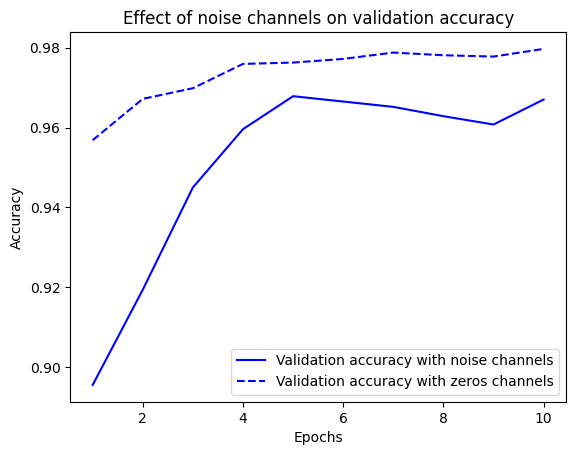

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
# 将标签随机打乱
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2, verbose=0)

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1132.5944 - accuracy: 0.4512 - val_loss: 10.1530 - val_accuracy: 0.3450
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 5.7576 - accuracy: 0.2816 - val_loss: 3.4377 - val_accuracy: 0.2474
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 4.7185 - accuracy: 0.2723 - val_loss: 2.1212 - val_accuracy: 0.2822
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 3.2106 - accuracy: 0.2608 - val_loss: 2.2722 - val_accuracy: 0.2309
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8021 - accuracy: 0.2706 - val_loss: 2.3478 - val_accuracy: 0.3157
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7123 - accuracy: 0.2738 - val_loss: 2.3678 - val_accuracy: 0.2765
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0988 - accuracy: 0.2790 - val_loss: 3.3263 - val_accuracy: 0.3396
Ep

**The same model with a more appropriate learning rate**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3419 - accuracy: 0.9137 - val_loss: 0.1952 - val_accuracy: 0.9528
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1458 - accuracy: 0.9630 - val_loss: 0.1531 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1127 - accuracy: 0.9730 - val_loss: 0.2019 - val_accuracy: 0.9641
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1020 - accuracy: 0.9779 - val_loss: 0.2060 - val_accuracy: 0.9693
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0905 - accuracy: 0.9811 - val_loss: 0.2384 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0800 - accuracy: 0.9845 - val_loss: 0.2484 - val_accuracy: 0.9703
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0758 - accuracy: 0.9864 - val_loss: 0.2761 - val_accuracy: 0.9693
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6680 - accuracy: 0.8346 - val_loss: 0.3588 - val_accuracy: 0.9030
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.9027 - val_loss: 0.3065 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.9125 - val_loss: 0.2903 - val_accuracy: 0.9195
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2991 - accuracy: 0.9160 - val_loss: 0.2815 - val_accuracy: 0.9219
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2897 - accuracy: 0.9190 - val_loss: 0.2748 - val_accuracy: 0.9242
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9206 - val_loss: 0.2728 - val_accuracy: 0.9255
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9224 - val_loss: 0.2685 - val_accuracy: 0.9274
Epoch 

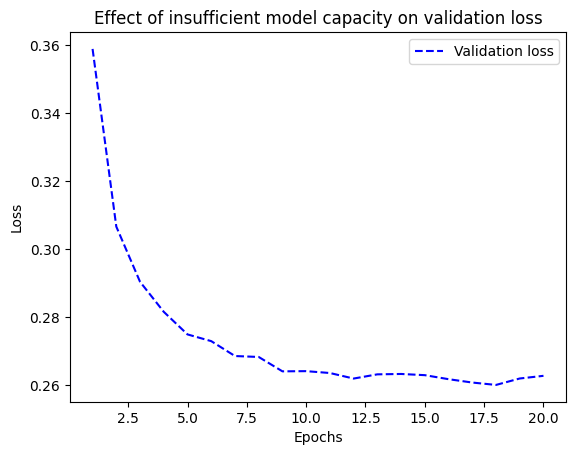

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3604 - accuracy: 0.8990 - val_loss: 0.1892 - val_accuracy: 0.9458
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1605 - accuracy: 0.9523 - val_loss: 0.1507 - val_accuracy: 0.9542
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1128 - accuracy: 0.9675 - val_loss: 0.1125 - val_accuracy: 0.9672
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0867 - accuracy: 0.9739 - val_loss: 0.1028 - val_accuracy: 0.9689
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.0970 - val_accuracy: 0.9720
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0981 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0969 - val_accuracy: 0.9737
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5210 - accuracy: 0.7797 - val_loss: 0.3941 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3176 - accuracy: 0.8992 - val_loss: 0.3100 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2357 - accuracy: 0.9255 - val_loss: 0.3017 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1898 - accuracy: 0.9406 - val_loss: 0.2786 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1522 - accuracy: 0.9516 - val_loss: 0.2761 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1279 - accuracy: 0.9599 - val_loss: 0.2889 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1073 - accuracy: 0.9677 - val_loss: 0.3116 - val_accuracy: 0.8843
Epoch 8/20
30

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6546 - accuracy: 0.5897 - val_loss: 0.6104 - val_accuracy: 0.6914
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5805 - accuracy: 0.7297 - val_loss: 0.5609 - val_accuracy: 0.7708
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5308 - accuracy: 0.8018 - val_loss: 0.5286 - val_accuracy: 0.7681
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4923 - accuracy: 0.8443 - val_loss: 0.4996 - val_accuracy: 0.8244
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4610 - accuracy: 0.8756 - val_loss: 0.4830 - val_accuracy: 0.8244
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4355 - accuracy: 0.8957 - val_loss: 0.4650 - val_accuracy: 0.8552
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4133 - accuracy: 0.9135 - val_loss: 0.4520 - val_accuracy: 0.8695
Epoch 8/20
30

**Version of the model with higher capacity**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5515 - accuracy: 0.7604 - val_loss: 0.3014 - val_accuracy: 0.8833
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2550 - accuracy: 0.8968 - val_loss: 0.3980 - val_accuracy: 0.8383
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1608 - accuracy: 0.9375 - val_loss: 0.3070 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0982 - accuracy: 0.9674 - val_loss: 0.3428 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0354 - accuracy: 0.9909 - val_loss: 0.5898 - val_accuracy: 0.8266
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.5372 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 8.5276e-04 - accuracy: 0.9999 - val_loss: 0.6366 - val_accuracy: 0.8850
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [14]:
from tensorflow.keras import regularizers

# L2正则化
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5950 - accuracy: 0.7829 - val_loss: 0.4614 - val_accuracy: 0.8688
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3917 - accuracy: 0.8929 - val_loss: 0.3813 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3235 - accuracy: 0.9156 - val_loss: 0.3953 - val_accuracy: 0.8687
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2946 - accuracy: 0.9243 - val_loss: 0.3581 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2728 - accuracy: 0.9345 - val_loss: 0.3705 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2620 - accuracy: 0.9362 - val_loss: 0.3739 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2510 - accuracy: 0.9411 - val_loss: 0.3659 - val_accuracy: 0.8834
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [15]:
from tensorflow.keras import regularizers
# L1正则化
regularizers.l1(0.001)
# 同时做L1正则化和L2正则化
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

dropout的核心思想：在层的输出值中引入噪声，打破不重要的偶然模式。

In [16]:
# 添加dropout层
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6473 - accuracy: 0.6140 - val_loss: 0.5570 - val_accuracy: 0.8447
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5481 - accuracy: 0.7443 - val_loss: 0.4655 - val_accuracy: 0.8710
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4689 - accuracy: 0.8149 - val_loss: 0.3876 - val_accuracy: 0.8768
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4026 - accuracy: 0.8485 - val_loss: 0.3526 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3462 - accuracy: 0.8804 - val_loss: 0.3143 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3008 - accuracy: 0.9030 - val_loss: 0.2955 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2674 - accuracy: 0.9145 - val_loss: 0.2905 - val_accuracy: 0.8861
Epoch 8/20
30

## Summary